In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.normalizar import normalizar_0_1, normalizar_neg1_1
from utils.diferenciaciones import diferenciar
from utils.estandarizacion import estandarizar
from utils.escalas import logaritmica, cuadrada, raiz
from utils.descomp_cuantitativa import tendencia, estacionalidad
from utils.fourier import dom_freq
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.ticker import MultipleLocator

In [15]:
pd.set_option("display.max_columns", None)

# Datasets

### Dataset CMAPSS


In [16]:
ruta_dataset = 'data/train_FD001.txt'

headers = [
    "unit_number",
    "time_cycles",
    "operational_setting_1",
    "operational_setting_2",
    "operational_setting_3"]
headers += [f"sensor_{i}" for i in range(1, 22)]

df_FD001 = pd.read_csv(ruta_dataset, delim_whitespace=True, header=None, names=headers)

df = df_FD001.copy()
sensores = ['sensor_2', 'sensor_9']
df = df[sensores]
df['conteo'] = range(1, len(df) + 1)
df = df[['conteo'] + sensores]
df.head()

/tmp/ipykernel_2762/3838098787.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_FD001 = pd.read_csv(ruta_dataset, delim_whitespace=True, header=None, names=headers)


,conteo,sensor_2,sensor_9
0,1,641.82,9046.19
1,2,642.15,9044.07
2,3,642.35,9052.94
3,4,642.35,9049.48
4,5,642.37,9055.15


### Dataset Battery


In [19]:
ruta_dataset = 'data/battery00.csv'
df_battery = pd.read_csv(ruta_dataset)
variables = ['time', 'temperature_battery']

df_battery = df_battery[variables]

df_battery.head()

,time,temperature_battery
0,0.000,0.000
1,1.894,23.059
2,2.814,23.059
3,3.734,23.063
4,4.654,23.063


In [20]:
# Crear columna de tiempo absoluto (si no existe)
df_battery['timestamp'] = pd.to_timedelta(df_battery['time'], unit='s')

# Reindexar a intervalo uniforme de 1 segundo
df_battery = df_battery.set_index('timestamp').resample('1S').interpolate()

/tmp/ipykernel_2762/2220149201.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_battery = df_battery.set_index('timestamp').resample('1S').interpolate()


In [25]:
df_battery.drop(['time'], axis=1, inplace = True)
df_battery.head()

,temperature_battery
timestamp,
0 days 00:00:00,0.000000
0 days 00:00:01,0.046143
0 days 00:00:02,0.092286
0 days 00:00:03,0.138429
0 days 00:00:04,0.184573


/tmp/ipykernel_2762/2893619212.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks_dias)


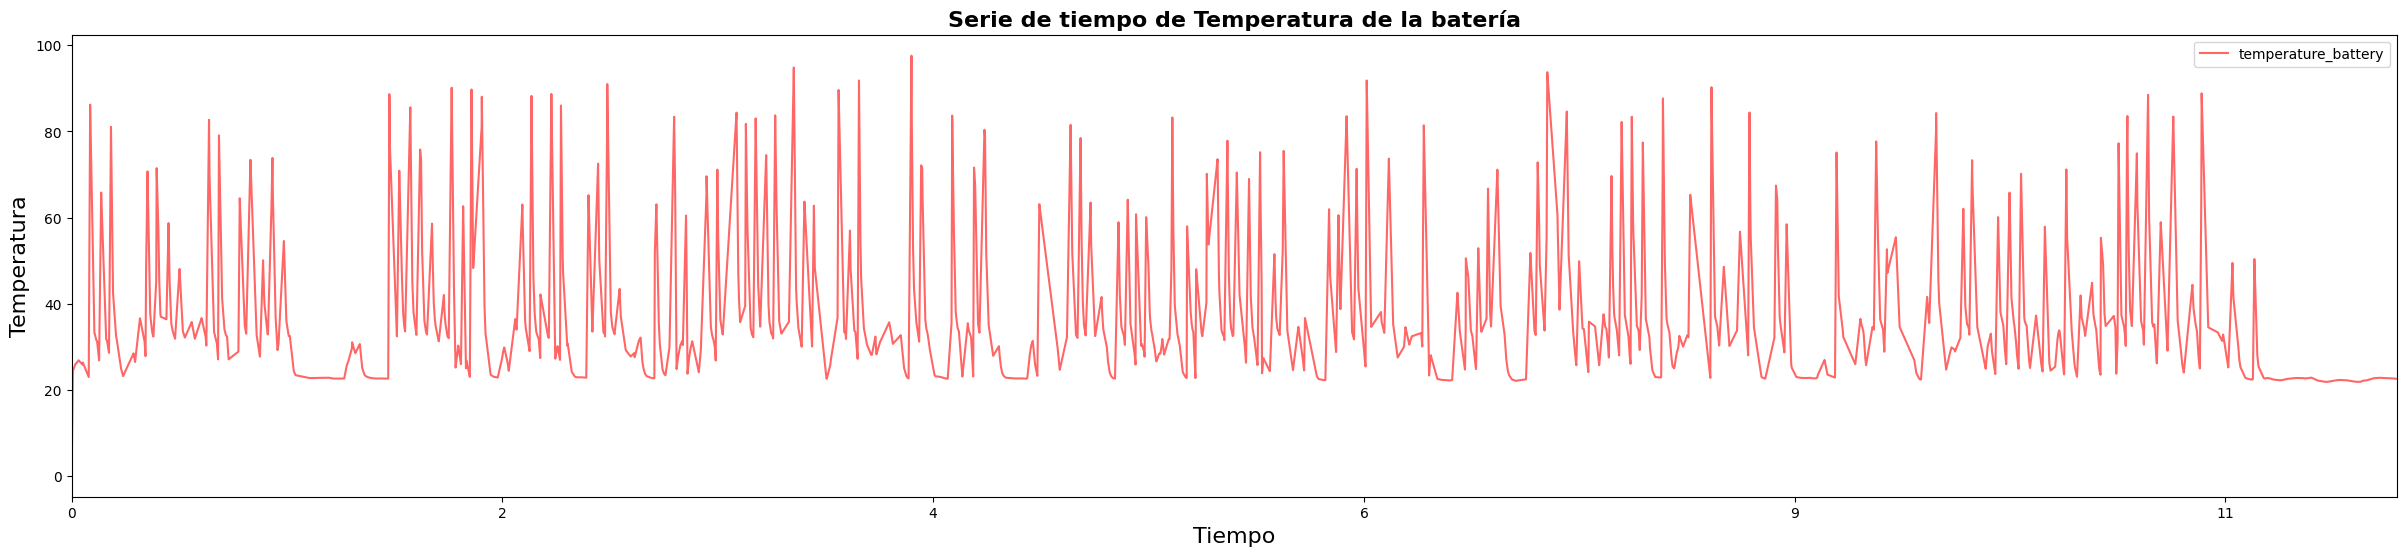

In [26]:
ax = df_battery.plot(
    figsize=(30, 6),
    title=f'Serie de la temperatura de la batería',
    alpha = 0.6,
    color = 'red')

# Convertir ticks de nanosegundos a días
xticks = ax.get_xticks()
xticks_dias = (xticks / 1e9 / 3600 / 24).astype(int)  # nanosegundos → segundos → horas → días
ax.set_xticklabels(xticks_dias)

ax.set_xlabel('Tiempo', fontsize=16)
ax.set_ylabel('Temperatura', fontsize=16)
ax.set_title(f'Serie de tiempo de Temperatura de la batería', fontsize=16, fontweight='bold')
#plt.savefig(f"img/1_{sensor}.png")
plt.show()

In [8]:
df_battery.info()

<class 'pandas.core.series.Series'>
TimedeltaIndex: 1079484 entries, 0 days 00:00:00 to 12 days 11:51:23
Freq: s
Series name: temperature_battery
Non-Null Count    Dtype  
--------------    -----  
1079484 non-null  float64
dtypes: float64(1)
memory usage: 16.5 MB
